<a href="https://colab.research.google.com/github/mpatrini7/DataLAB42/blob/main/Week3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mpatrini - Michael Patrini

In [1]:
import pandas as pd

**1.Check the head of the dataset**

In [3]:
sal = pd.read_csv("datasets/Salaries.csv")
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**2.Use the .info() method to find out how many entries there are**

In [4]:
a = sal.info()
a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**3.Check the highest amount of OvertimePay in the dataset ?**

In [5]:
a = sal['OvertimePay'].max()
a

245131.88

**4.What is the job title of JOSEPH DRISCOLL ?**

In [6]:
a = sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL','JobTitle'].values[0]
a

'CAPTAIN, FIRE SUPPRESSION'

**5.How much does JOSEPH DRISCOLL make (including benefits)?**

In [7]:
a = sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL','TotalPayBenefits'].values[0]
a

270324.91

**6.What is the name of highest paid person (including benefits)?**

In [8]:
a = sal.loc[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max(),'EmployeeName'].values[0]
a

'NATHANIEL FORD'

**7.What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [9]:
a = sal.loc[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min(),'EmployeeName'].values[0]
print(a)
print("Negative paycheck")

Joe Lopez
Negative paycheck


**8.What was the average (mean) BasePay of all employees per year? (2011- 2014) ?**

In [10]:
# a = sal.loc[sal['Year'] == 2011,'BasePay']
# print("2011: {:.2f}".format(a.mean()))
# a = sal.loc[sal['Year'] == 2012,'BasePay']
# print("2012: {:.2f}".format(a.mean()))
# a = sal.loc[sal['Year'] == 2013,'BasePay']
# print("2013: {:.2f}".format(a.mean()))
# a = sal.loc[sal['Year'] == 2014,'BasePay']
# print("2014: {:.2f}".format(a.mean()))
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

In [11]:
a = sal['JobTitle'].nunique()
a

2159

**10.What are the top 5 most common jobs?**

In [12]:
a = sal['JobTitle'].value_counts().index.tolist()
for i in range(0,5):
  print("{}: {}".format(i + 1, a[i]))

1: Transit Operator
2: Special Nurse
3: Registered Nurse
4: Public Svc Aide-Public Works
5: Police Officer 3


**11. How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [13]:
a = sal.loc[sal['Year'] == 2013,'JobTitle']
a = (a.value_counts() == 1).sum()
a

202

**12. How many people have the word Chief in their job title?**

In [15]:
# a = sal.JobTitle.str.contains('Chief|CHIEF').sum()
a = sum(sal["JobTitle"].apply(lambda x : True if "chief" in x.lower() else False))
a

627

# ***netflix&chill***

**Using the dataset "titles.csv", answer these questions graphically - that is - by creating visualizations through matplotlib.**

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
tit = pd.read_csv("datasets/titles.csv")
tit.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


**1) Which are the years with the highest number of movies released on Netflix?**

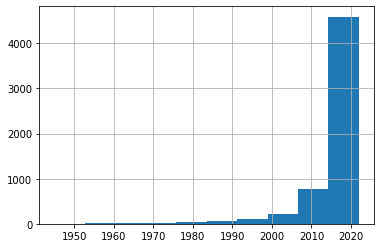

In [18]:
a = tit['release_year'].hist()
a

**2) Is there a majority of tv shows or movies on Netflix?**

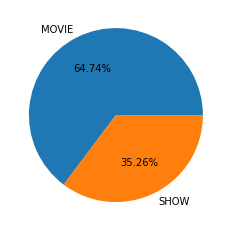

In [101]:
plt.pie(tit.type.value_counts(),labels=tit.type.value_counts().index,  autopct='%2.2f%%')
plt.show()

**3) What are the most popular genres on Netflix and the ones with the highest imbd rating?**

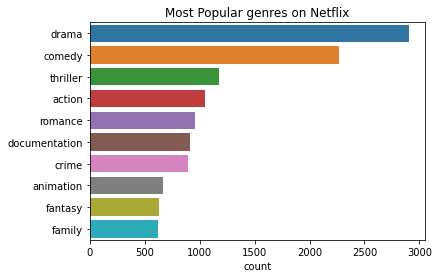

TypeError: ignored

In [270]:
#Most Popular genres on Netflix"
tit2 = tit.set_index('title').genres.str.replace('[','', regex=False).str.replace(']','', regex=False).str.replace("'",'', regex=False).str.replace(" ",'', regex=False).str.split(',', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = tit2, order=tit2.value_counts().index[:10])
plt.title("Most Popular genres on Netflix")
plt.show()

#Highest IMDB genres on Netflix
tit2 = tit.set_index('imdb_score').genres.str.replace('[','', regex=False).str.replace(']','', regex=False).str.replace("'",'', regex=False).str.replace(" ",'', regex=False).str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename()
tit2 = pd.Series(tit2.index.values, index=tit2)
tit2 = tit2.to_frame()
# sorted_series = tit2.groupby(level = 0).mean()
sorted_series = tit2.groupby(by = tit2.index).mean().sort_values()
# sns.countplot(y = tit2, order=tit2.imdb.mean().index[:10])
# plt.title("Highest IMDB genres on Netflix")
# plt.show()
print(sorted_series)

**4) Which is the year with most popular US movies?**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


release_year
1945    AxesSubplot(0.125,0.125;0.775x0.755)
1954    AxesSubplot(0.125,0.125;0.775x0.755)
1964    AxesSubplot(0.125,0.125;0.775x0.755)
1966    AxesSubplot(0.125,0.125;0.775x0.755)
1967    AxesSubplot(0.125,0.125;0.775x0.755)
1968    AxesSubplot(0.125,0.125;0.775x0.755)
1971    AxesSubplot(0.125,0.125;0.775x0.755)
1972    AxesSubplot(0.125,0.125;0.775x0.755)
1973    AxesSubplot(0.125,0.125;0.775x0.755)
1976    AxesSubplot(0.125,0.125;0.775x0.755)
1979    AxesSubplot(0.125,0.125;0.775x0.755)
1980    AxesSubplot(0.125,0.125;0.775x0.755)
1981    AxesSubplot(0.125,0.125;0.775x0.755)
1982    AxesSubplot(0.125,0.125;0.775x0.755)
1983    AxesSubplot(0.125,0.125;0.775x0.755)
1984    AxesSubplot(0.125,0.125;0.775x0.755)
1986    AxesSubplot(0.125,0.125;0.775x0.755)
1987    AxesSubplot(0.125,0.125;0.775x0.755)
1988    AxesSubplot(0.125,0.125;0.775x0.755)
1989    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
1991    AxesSubplot(0.125,0.125;0.775x0.75

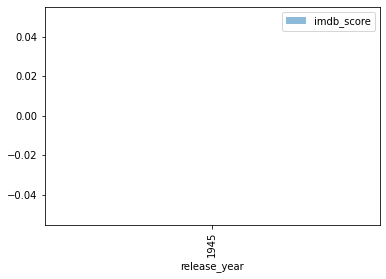

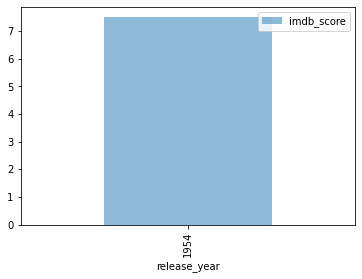

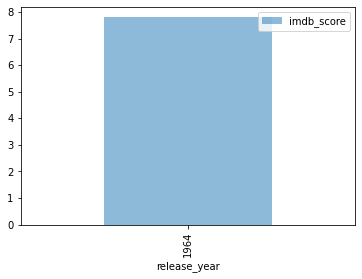

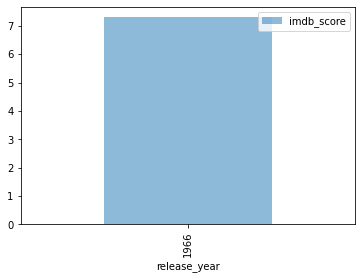

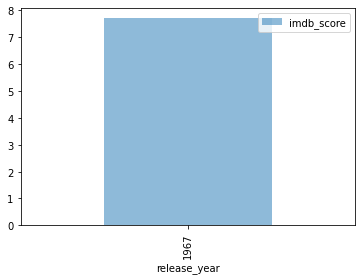

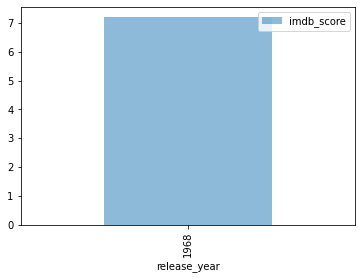

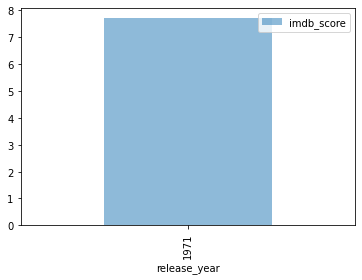

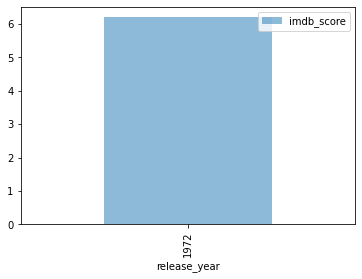

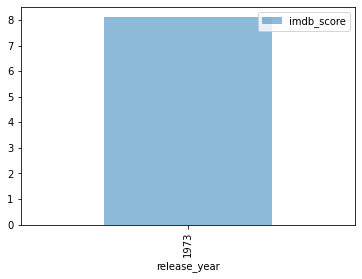

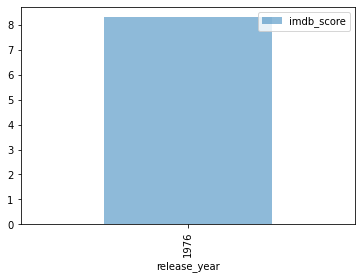

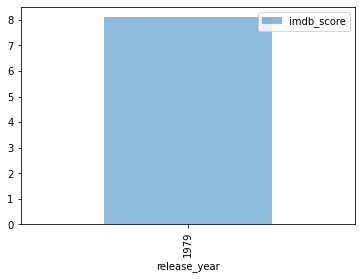

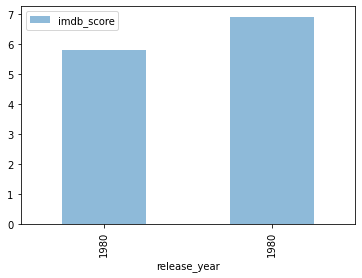

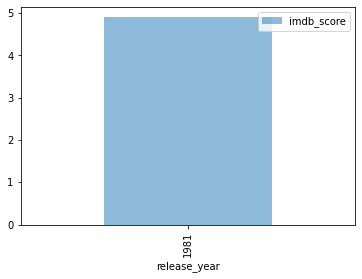

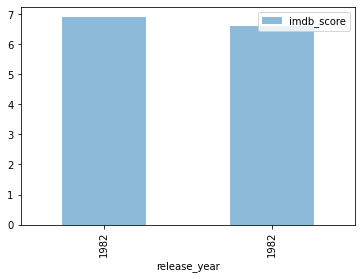

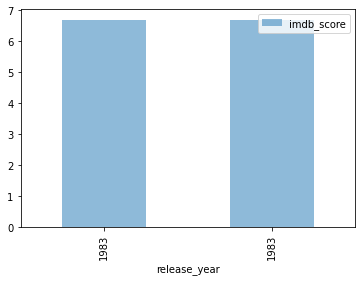

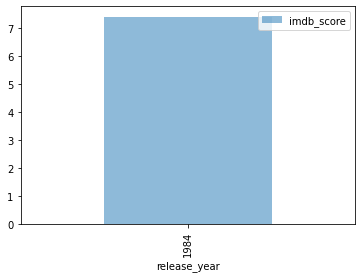

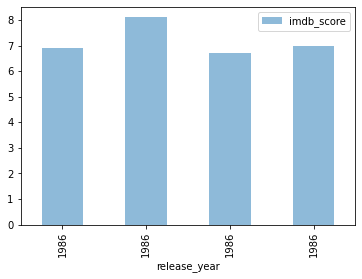

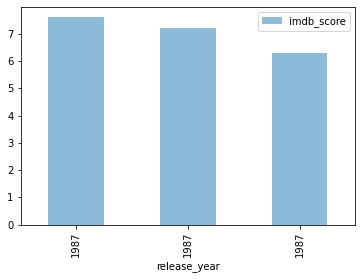

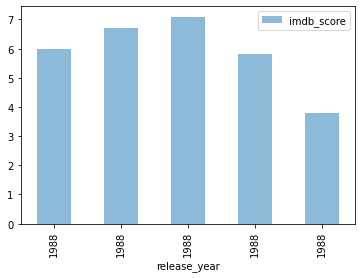

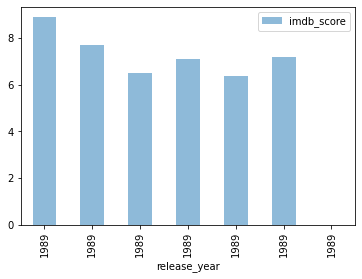

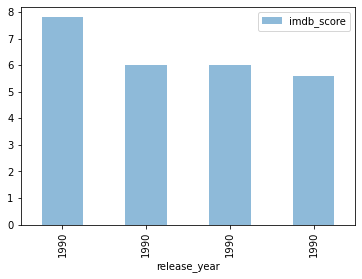

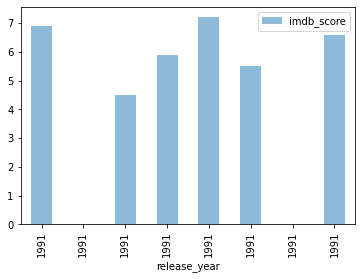

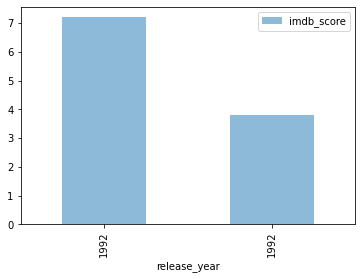

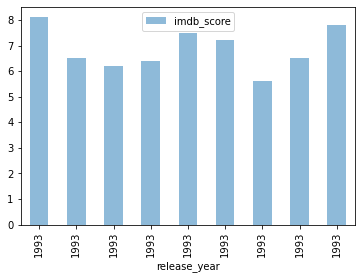

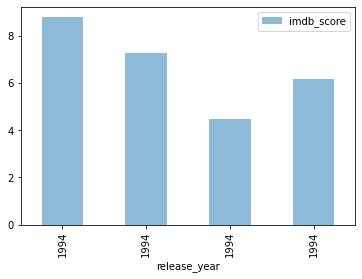

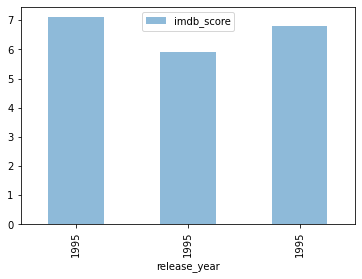

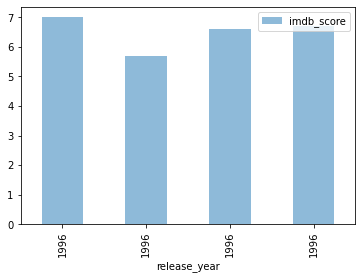

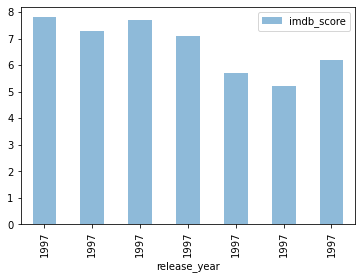

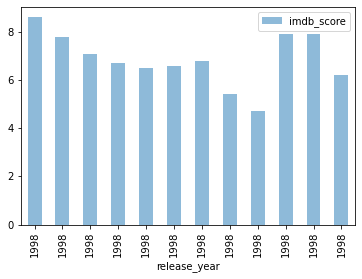

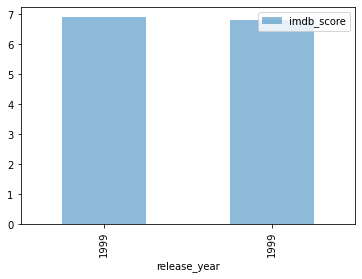

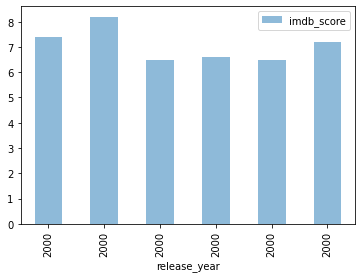

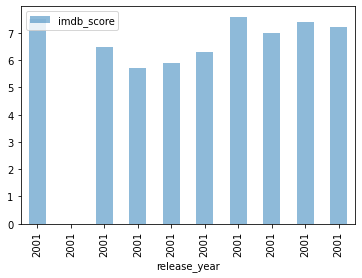

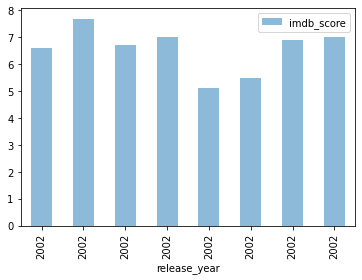

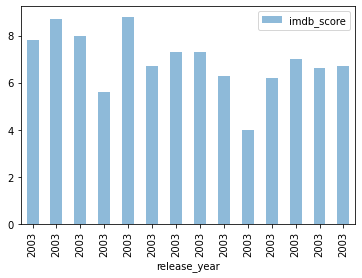

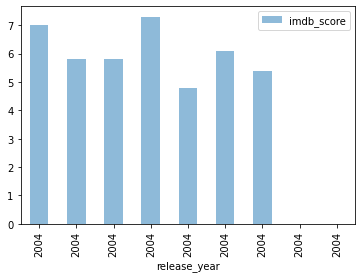

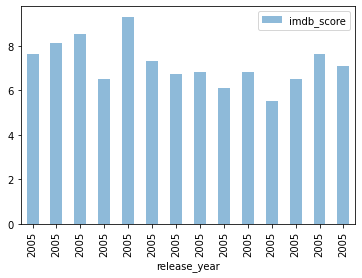

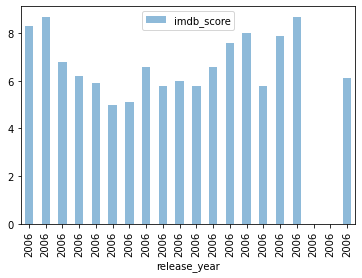

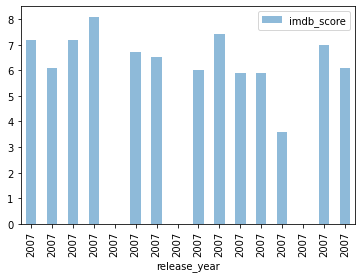

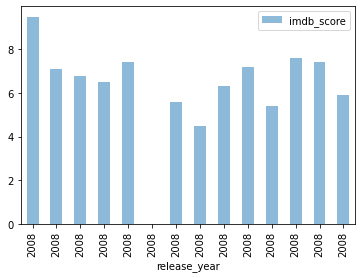

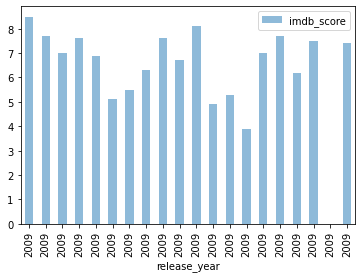

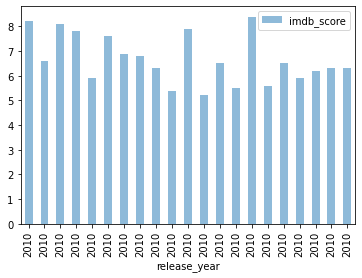

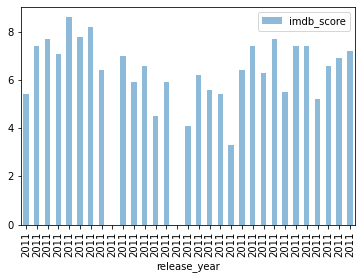

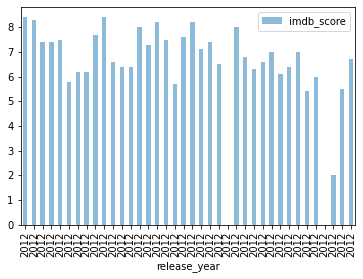

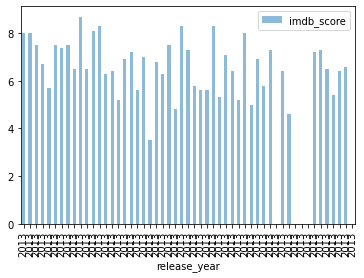

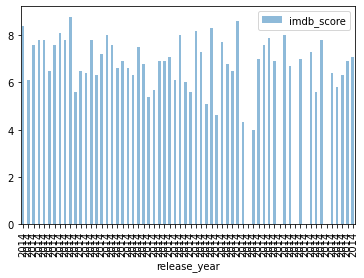

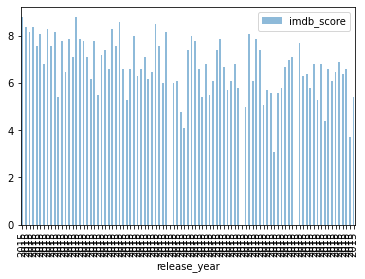

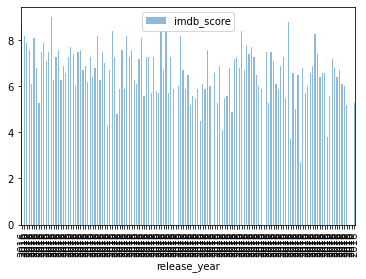

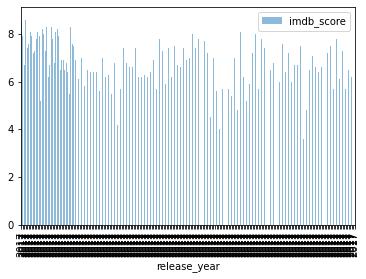

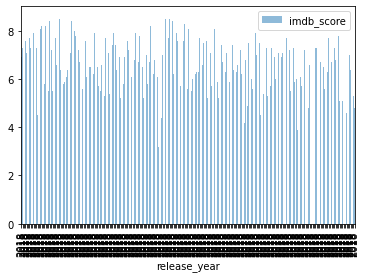

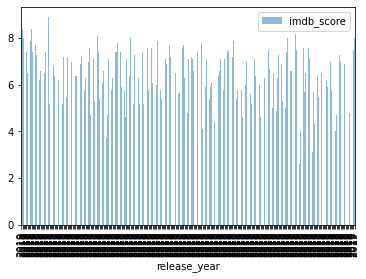

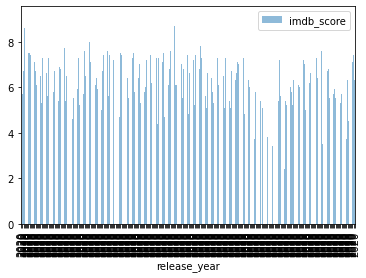

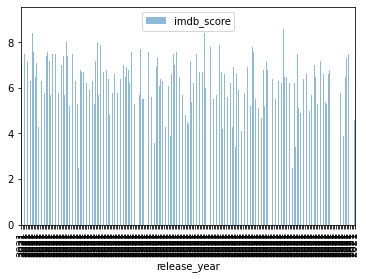

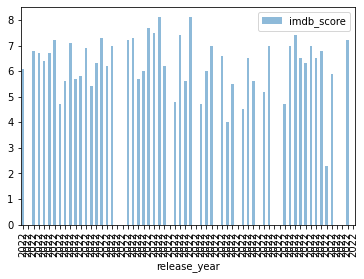

In [208]:
tit[tit["production_countries"] == "['US']"].groupby('release_year').plot.bar(x="release_year", y="imdb_score", alpha=0.5)